# Softmax 

## Load the data 

In [1]:
# Load the data into 5 ndarrays
# The shape of the ndarrays are printed below
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

%load_ext autoreload
%autoreload 2

from load_data import load_data

X_train, y_train, X_val, y_val, X_test = load_data()
num_train = X_train.shape[0]
num_val = X_val.shape[0]

print("Data loaded:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape: ", X_test.shape)

Data loaded:
X_train shape: (37800, 28, 28)
y_train shape: (37800,)
X_val shape: (4200, 28, 28)
y_val shape: (4200,)
X_test shape:  (28000, 28, 28)


In [18]:
def softmax_loss_vectorized(W, X, y, reg):
    loss = 0.0
    dW = np.zeros_like(W)

    num_classes = W.shape[1]
    num_train = X.shape[0]
    
    scores = X.dot(W)
    prob = np.exp(scores - np.max(scores, axis = 1, keepdims = True))
    normed_prob = prob / np.sum(prob, axis = 1, keepdims = True)
    loss = -np.sum(np.log(normed_prob[np.arange(num_train), y]))
    
    normed_prob[np.arange(num_train), y] -= 1
    dW = X.T.dot(normed_prob)
    
    loss /= num_train
    loss += reg * np.sum(W * W)
    
    dW /= num_train
    dW += 2 * reg * W

    return loss, dW

In [19]:
def flatten(X):
    return X.reshape(X.shape[0], -1)

In [22]:
X_train = flatten(X_train)
X_val = flatten(X_val)
W = np.random.randn(X_train.shape[1], 10) * 1e-3
softmax_loss(W, X_train, y_train, 0.25)

(4.54590494590025,
 array([[ 4.21038468e-05,  8.91900499e-04, -4.24141741e-04, ...,
         -2.24358199e-04,  3.24935680e-04,  3.67175480e-04],
        [-3.52435292e-04, -1.41128612e-04, -5.51558901e-05, ...,
          2.61370151e-04, -4.23384782e-05, -1.14520337e-05],
        [ 9.44163253e-05, -6.06214076e-05, -2.99499975e-04, ...,
          4.58897606e-04,  4.05776805e-04, -5.42171900e-04],
        ...,
        [ 4.46225590e-05,  6.37812529e-04,  3.81576505e-04, ...,
         -1.21863123e-03, -2.17734246e-04, -6.79476822e-04],
        [-8.52423295e-04,  8.81900459e-04,  2.36982923e-04, ...,
          7.56470203e-04, -2.19223638e-04,  6.68483372e-04],
        [-5.07164007e-04,  1.70579201e-04, -2.73387119e-05, ...,
          7.10736976e-04, -9.45990134e-04, -2.60565818e-04]]))

In [27]:
iterations = 50
learning_rate = 1e-5
reg = 0.25
weight_scale = 1e-5
decay = 0.95

W = np.random.randn(X_train.shape[1], 10) * weight_scale
loss = [None] * (iterations+1)
for i in np.arange(iterations+1):
    loss[i], dW = softmax_loss(W, X_train, y_train, reg=reg)
    W -= dW * learning_rate
    if i % 10 == 0:
        print("Iterations {:4d}/{:4d}:".format(i, iterations), loss[i])
        learning_rate *= decay

Iterations    0/  50: 2.3030054462862863
Iterations   10/  50: 0.7462564752776198
Iterations   20/  50: 0.5598734597011293
Iterations   30/  50: 0.4997325713383402
Iterations   40/  50: 0.4654822893254367
Iterations   50/  50: 0.44286914785453024


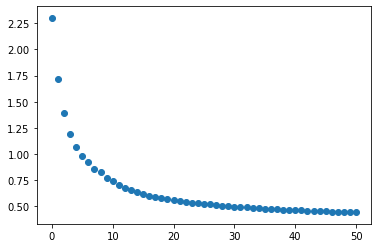

In [30]:
plt.scatter(np.arange(iterations+1), loss)
plt.show()

In [33]:
def softmax_predict(W, X):
    scores = X.dot(W)
    prob = np.exp(scores - np.max(scores, axis = 1, keepdims = True))
    normed_prob = prob / np.sum(prob, axis = 1, keepdims = True)
    labels = np.argmax(normed_prob, axis=1)
    return labels

In [35]:
X_train_pred = softmax_predict(W, X_train)
print("Training set accuracy: ", np.mean(X_train_pred == y_train))
X_val_pred = softmax_predict(W, X_val)
print("Validation set accuracy: ", np.mean(X_val_pred == y_val))

Training set accuracy:  0.8844973544973544
Validation set accuracy:  0.8866666666666667
